In [ ]:
# !gdown 1iDa-l_cAwyUeNX9jKIRU2uEVyJcgYAf6
# !gdown 1zme9CVdj7s3p-62AeVCHCG4cisq2FzoF
# !gdown 1yLQdCQO59jXT-5Ip0XttZEw0YHkm7qpo

Downloading...
From: https://drive.google.com/uc?id=1iDa-l_cAwyUeNX9jKIRU2uEVyJcgYAf6
To: /content/WORK_bank_data_train.csv
100% 106M/106M [00:01<00:00, 102MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1zme9CVdj7s3p-62AeVCHCG4cisq2FzoF
To: /content/WORK_WORK_BANK_DATA_test_sample.csv
100% 5.88M/5.88M [00:00<00:00, 197MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yLQdCQO59jXT-5Ip0XttZEw0YHkm7qpo
To: /content/Постановка задачи, описание полей.xlsx
100% 12.2k/12.2k [00:00<00:00, 47.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import copy
import warnings
import pickle

warnings.filterwarnings("ignore")

In [ ]:
data2 = pd.read_csv('WORK_bank_data_train.csv', delimiter = ';')
data2.head()

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,...,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,...,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,34,Midlands,2.0,51,Gold,No,...,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,...,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,...,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,...,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No


## Статистики

In [ ]:
def get_column_statistics(dataframe):
    """
    Calculate statistics for each column in a pandas DataFrame.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        The DataFrame to calculate statistics for.

    Returns
    -------
    pandas.DataFrame
        A DataFrame containing the statistics for each column in the input DataFrame.
    """
    total_rows = dataframe.shape[0]
    unique_percentages = []
    zero_percentages = []
    null_counts = []
    column_names = []
    unique_counts = []
    zero_counts = []
    null_percentages = []

    columns_left = dataframe.shape[1]
    while columns_left > 0:
        column_name = dataframe.columns[-columns_left]
        column_data = dataframe[column_name]

        # Collect the column name
        column_names.append(column_name)

        # Calculate the number of null values and their percentage
        null_count = column_data.isnull().sum()
        null_counts.append(null_count)
        null_percent = round((null_count / total_rows) * 100, 2)
        null_percentages.append(null_percent)

        # Calculate the number of unique values and their percentage
        unique_count = len(column_data.unique())
        unique_counts.append(unique_count)
        unique_percent = round((unique_count / total_rows) * 100, 2)
        unique_percentages.append(unique_percent)

        # Calculate the number of zero values and their percentage
        zero_count = column_data.value_counts().get(0, 0)
        zero_counts.append(zero_count)
        zero_percent = round((zero_count / total_rows) * 100, 2)
        zero_percentages.append(zero_percent)

        columns_left -= 1

    statistics_dataframe = pd.DataFrame({'Column Name': column_names,
                                         'Zero Count': zero_counts,
                                         'Unique Count': unique_counts,
                                         'Zero Percentage': zero_percentages,
                                         'Null Count': null_counts,
                                         'Unique Percentage': unique_percentages,
                                         'Null Percentage': null_percentages})
    return statistics_dataframe

Тут присутствуют Нулы в возрасте (AGe) и в Lifetime


In [ ]:
get_column_statistics(data2)

,Column Name,Zero Count,Unique Count,Zero Percentage,Null Count,Unique Percentage,Null Percentage
0,ID,0,985477,0.00,0,100.00,0.00
1,Age,0,63,0.00,66958,0.01,6.79
2,Ind_Household,640250,2,64.97,0,0.00,0.00
3,Age_group,578936,4,58.75,0,0.00,0.00
4,District,53206,56,5.40,0,0.01,0.00
5,Region,382905,6,38.85,0,0.00,0.00
6,Lifetime,2110,40,0.21,12608,0.00,1.28
7,Income,0,51,0.00,0,0.01,0.00
8,Segment,379739,4,38.53,0,0.00,0.00
9,Ind_deposit,797999,2,80.98,0,0.00,0.00


Этот код использует метод dropna() из библиотеки pandas для удаления всех строк из DataFrame data, которые содержат хотя бы одно значение NaN (Not a Number) или NULL. Параметр subset указывает на то, что операция должна быть выполнена для всех столбцов в DataFrame (data.columns).

В результате выполнения этого кода в DataFrame data останутся только те строки, которые не содержат ни одного значения NaN или NULL.

In [ ]:
print(data2.shape)
data2 = data2.dropna(subset = data2.columns)
data2 = data2.drop(data2[data2['Gender'] == 'U'].index)
print(data2.shape)
data2.head()

(985477, 22)
(733165, 22)


,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,...,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,...,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,...,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,...,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,...,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No
5,1200000006,33.0,No,middle,23,South West,4.0,46,Tin,Yes,...,No,1911.35,2907.30,4143.86,5,30,842.87,F,No,No


In [ ]:
get_column_statistics(data2)

,Column Name,Zero Count,Unique Count,Zero Percentage,Null Count,Unique Percentage,Null Percentage
0,ID,0,733165,0.00,0,100.00,0.0
1,Age,0,62,0.00,0,0.01,0.0
2,Ind_Household,476166,2,64.95,0,0.00,0.0
3,Age_group,465070,3,63.43,0,0.00,0.0
4,District,40792,56,5.56,0,0.01,0.0
5,Region,284219,6,38.77,0,0.00,0.0
6,Lifetime,1632,38,0.22,0,0.01,0.0
7,Income,0,50,0.00,0,0.01,0.0
8,Segment,282280,4,38.50,0,0.00,0.0
9,Ind_deposit,593515,2,80.95,0,0.00,0.0


Этот код использует метод isna() из библиотеки pandas для создания нового DataFrame, в котором каждое значение заменяется на True, если оно равно NaN (Not a Number) или NULL, и на False в противном случае. Затем метод sum() используется для подсчета количества значений True (то есть значений NaN или NULL) в каждом столбце DataFrame.

Параметр axis=0 указывает на то, что подсчет должен быть выполнен по столбцам (то есть для каждого столбца будет вычислено общее количество значений NaN или NULL).

В результате выполнения этого кода будет возвращен новый Series, в котором индексы соответствуют именам столбцов в исходном DataFrame data, а значения - количеству значений NaN или NULL в соответствующих столбцах.

In [ ]:
data2.isna().sum(axis=0)

ID                0
Age               0
Ind_Household     0
Age_group         0
District          0
Region            0
Lifetime          0
Income            0
Segment           0
Ind_deposit       0
Ind_email         0
Ind_phone         0
Ind_salary        0
trans_6_month     0
trans_9_month     0
trans_12_month    0
amont_trans       0
amont_day_from    0
trans_3_month     0
Gender            0
Target1           0
Target2           0
dtype: int64

Этот код использует функцию deepcopy() из модуля copy для создания полной копии объекта DataFrame data. Это означает, что новый объект DataFrame df будет содержать точно такие же данные, как и исходный объект data, но изменения в одном из этих объектов не повлияют на другой.

Функция deepcopy() создает копию не только самого объекта DataFrame, но и всех вложенных объектов (например, столбцов и значений в них). Это означает, что вы можете безопасно изменять данные в новом объекте DataFrame df, не беспокоясь о том, что это повлияет на исходный объект data.

In [ ]:
df2 = copy.deepcopy(data2)


Посмотрим на корреляции

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.context('ggplot');

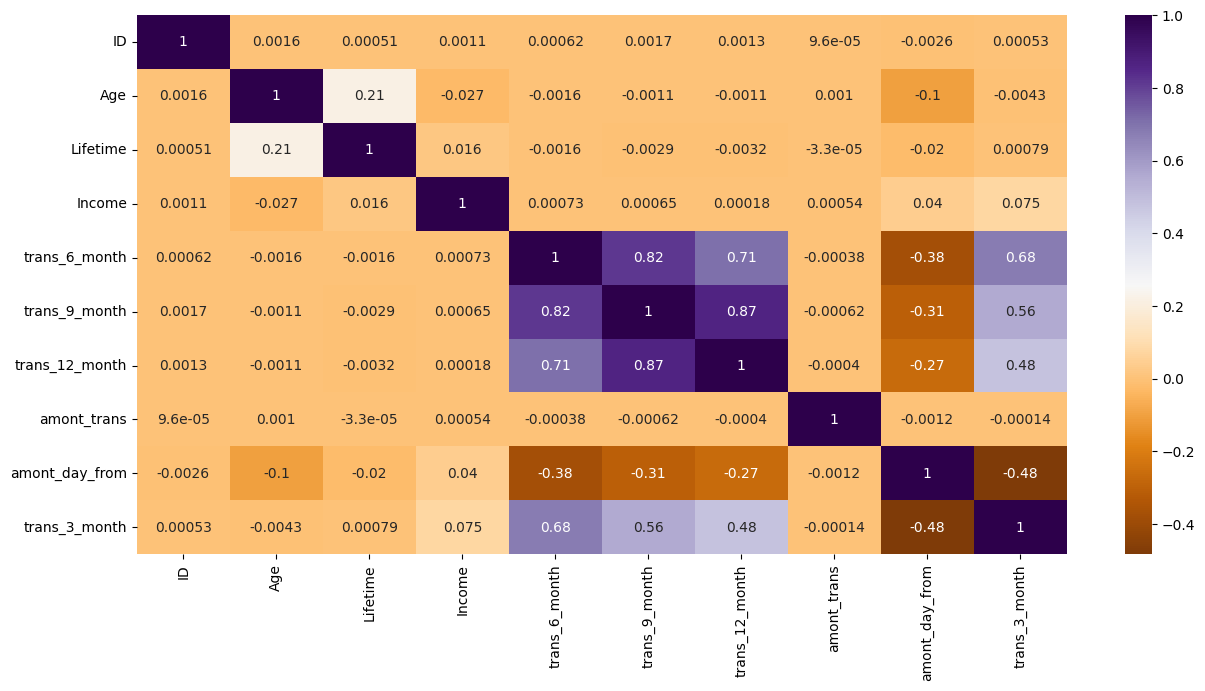

In [ ]:
fig = plt.figure(figsize = (15, 7))
sns.heatmap(df2.corr(), annot=True, cmap = 'PuOr');

# Part 2 (Zinovev)

## Отнормируем числовые переменные

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df2.drop(['ID', 'Target1', 'Target2'], axis=1).select_dtypes(include='number').columns
scaler = MinMaxScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])
df2.head()

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,...,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,0.540984,No,middle,02,Midlands,0.078947,0.56,Platinum,No,...,No,0.509187,0.402909,0.448284,0.041667,0.34375,0.417452,F,No,No
2,1200000003,0.442623,No,middle,17,North,0.157895,0.50,Silver,No,...,No,0.593804,0.540197,0.586768,0.208333,0.18750,0.621387,M,No,No
3,1200000004,0.983607,No,senior,49,Midlands,0.315789,0.54,Platinum,Yes,...,No,0.509628,0.446867,0.412410,0.041667,0.15625,0.575128,F,No,No
4,1200000005,0.639344,No,middle,19,South East,0.210526,0.54,Silver,Yes,...,No,0.674348,0.668199,0.713072,0.020833,0.50000,0.626156,F,Yes,No
5,1200000006,0.245902,No,middle,23,South West,0.105263,0.42,Tin,Yes,...,No,0.345506,0.335473,0.451276,0.083333,0.62500,0.267821,F,No,No


## Закодируем категориальные переменные

In [ ]:
categorical_columns = df2.drop(['ID', 'Target1', 'Target2'], axis=1).select_dtypes(include='object').columns
df2 = pd.get_dummies(df2, columns=categorical_columns)
df2.head()

,ID,Age,Lifetime,Income,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,...,Ind_deposit_No,Ind_deposit_Yes,Ind_email_No,Ind_email_Yes,Ind_phone_No,Ind_phone_Yes,Ind_salary_No,Ind_salary_Yes,Gender_F,Gender_M
0,1200000001,0.540984,0.078947,0.56,0.509187,0.402909,0.448284,0.041667,0.34375,0.417452,...,1,0,0,1,0,1,1,0,1,0
2,1200000003,0.442623,0.157895,0.50,0.593804,0.540197,0.586768,0.208333,0.18750,0.621387,...,1,0,0,1,0,1,1,0,0,1
3,1200000004,0.983607,0.315789,0.54,0.509628,0.446867,0.412410,0.041667,0.15625,0.575128,...,0,1,0,1,0,1,1,0,1,0
4,1200000005,0.639344,0.210526,0.54,0.674348,0.668199,0.713072,0.020833,0.50000,0.626156,...,0,1,0,1,0,1,1,0,1,0
5,1200000006,0.245902,0.105263,0.42,0.345506,0.335473,0.451276,0.083333,0.62500,0.267821,...,0,1,0,1,0,1,1,0,1,0


## Закодируем целевые переменные

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Target1'] = le.fit_transform(df2['Target1'])
df2['Target2'] = le.transform(df2['Target2'])

In [ ]:
for i, val in enumerate(le.classes_):
    print(f"{i}: {val}")

0: No
1: Yes


## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score


# Train the Decision Tree Classifier for Target1
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target1'], test_size=0.2, random_state=42)
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_test1)
print("Classification report for Target1:")
print(classification_report(y_test1, y_pred1))
y_pred1 = clf1.predict_proba(X_test1)[:, 1]
auc_roc1 = roc_auc_score(y_test1, y_pred1)
gini_score1 = 2 * auc_roc1 - 1
print(f"Gini score for Target1: {gini_score1:.3f}")
auc_pr_score = average_precision_score(y_test1, y_pred1)
print(f"AUC-PR Score for Target1: {auc_pr_score:.3f}")

# Train the Decision Tree Classifier for Target2
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target2'], test_size=0.2, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)
print("Classification report for Target2:")
print(classification_report(y_test2, y_pred2))
y_pred2 = clf2.predict_proba(X_test2)[:, 1]
auc_roc2 = roc_auc_score(y_test2, y_pred2)
gini_score2 = 2 * auc_roc2 - 1
print(f"Gini score for Target2: {gini_score2:.3f}")
auc_pr_score = average_precision_score(y_test2, y_pred2)
print(f"AUC-PR Score for Target2: {auc_pr_score:.3f}")

Classification report for Target1:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    104530
           1       0.87      0.87      0.87     42103

    accuracy                           0.92    146633
   macro avg       0.91      0.91      0.91    146633
weighted avg       0.92      0.92      0.92    146633

Gini score for Target1: 0.813
AUC-PR Score for Target1: 0.790
Classification report for Target2:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    132008
           1       0.74      0.74      0.74     14625

    accuracy                           0.95    146633
   macro avg       0.85      0.85      0.85    146633
weighted avg       0.95      0.95      0.95    146633

Gini score for Target2: 0.708
AUC-PR Score for Target2: 0.570


In [ ]:
with open('target1_DecisionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(clf1, f)
with open('target2_DecisionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(clf2, f)

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier for Target1
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target1'], test_size=0.2, random_state=42)
clf1 = RandomForestClassifier(random_state=42, n_jobs=-1)
clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_test1)
print("Classification report for Target1:")
print(classification_report(y_test1, y_pred1))
y_pred1 = clf1.predict_proba(X_test1)[:, 1]
auc_roc1 = roc_auc_score(y_test1, y_pred1)
gini_score1 = 2 * auc_roc1 - 1
print(f"Gini score for Target1: {gini_score1:.3f}")
auc_pr_score = average_precision_score(y_test1, y_pred1)
print(f"AUC-PR Score for Target1: {auc_pr_score:.3f}")

# Train the Random Forest Classifier for Target2
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target2'], test_size=0.2, random_state=42)
clf2 = RandomForestClassifier(random_state=42, n_jobs=-1)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)
print("Classification report for Target2:")
print(classification_report(y_test2, y_pred2))
y_pred2 = clf2.predict_proba(X_test2)[:, 1]
auc_roc2 = roc_auc_score(y_test2, y_pred2)
gini_score2 = 2 * auc_roc2 - 1
print(f"Gini score for Target2: {gini_score2:.3f}")
auc_pr_score = average_precision_score(y_test2, y_pred2)
print(f"AUC-PR Score for Target2: {auc_pr_score:.3f}")

Classification report for Target1:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    104530
           1       0.92      0.77      0.84     42103

    accuracy                           0.92    146633
   macro avg       0.92      0.87      0.89    146633
weighted avg       0.92      0.92      0.91    146633

Gini score for Target1: 0.942
AUC-PR Score for Target1: 0.943
Classification report for Target2:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    132008
           1       0.90      0.24      0.38     14625

    accuracy                           0.92    146633
   macro avg       0.91      0.62      0.67    146633
weighted avg       0.92      0.92      0.90    146633

Gini score for Target2: 0.870
AUC-PR Score for Target2: 0.696


In [ ]:
with open('target1_RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(clf1, f)
with open('target2_RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(clf2, f)

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

# Train the XGBClassifier for Target1
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target1'], test_size=0.2, random_state=42)
clf1 = XGBClassifier(random_state=42, n_jobs=-1)
clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_test1)
print("Classification report for Target1:")
print(classification_report(y_test1, y_pred1))
y_pred1 = clf1.predict_proba(X_test1)[:, 1]
auc_roc1 = roc_auc_score(y_test1, y_pred1)
gini_score1 = 2 * auc_roc1 - 1
print(f"Gini score for Target1: {gini_score1:.3f}")
auc_pr_score = average_precision_score(y_test1, y_pred1)
print(f"AUC-PR Score for Target1: {auc_pr_score:.3f}")

# Train the XGBClassifier for Target2
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target2'], test_size=0.2, random_state=42)
clf2 = XGBClassifier(random_state=42, n_jobs=-1)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)
print("Classification report for Target2:")
print(classification_report(y_test2, y_pred2))
y_pred2 = clf2.predict_proba(X_test2)[:, 1]
auc_roc2 = roc_auc_score(y_test2, y_pred2)
gini_score2 = 2 * auc_roc2 - 1
print(f"Gini score for Target2: {gini_score2:.3f}")
auc_pr_score = average_precision_score(y_test2, y_pred2)
print(f"AUC-PR Score for Target2: {auc_pr_score:.3f}")

Classification report for Target1:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    104530
           1       0.91      0.76      0.82     42103

    accuracy                           0.91    146633
   macro avg       0.91      0.86      0.88    146633
weighted avg       0.91      0.91      0.90    146633

Gini score for Target1: 0.905
AUC-PR Score for Target1: 0.921
Classification report for Target2:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    132008
           1       0.88      0.75      0.81     14625

    accuracy                           0.97    146633
   macro avg       0.93      0.87      0.90    146633
weighted avg       0.96      0.97      0.96    146633

Gini score for Target2: 0.968
AUC-PR Score for Target2: 0.907


In [ ]:
with open('target1_XGBClassifier.pkl', 'wb') as f:
    pickle.dump(clf1, f)
with open('target2_XGBClassifier.pkl', 'wb') as f:
    pickle.dump(clf2, f)

## Random choice

In [ ]:
yes_count = df2['Target1'].value_counts().get(1, 0)
total_rows = df2['Target1'].count()
percentage_yes = (yes_count / total_rows) * 100
print(f"The percentage of 'Yes' in column 'Target1' is: {percentage_yes}%")
yes_count = df2['Target2'].value_counts().get(1, 0)
total_rows = df2['Target2'].count()
percentage_yes = (yes_count / total_rows) * 100
print(f"The percentage of 'Yes' in column 'Target2' is: {percentage_yes}%")

The percentage of 'Yes' in column 'Target1' is: 28.48431117142799%
The percentage of 'Yes' in column 'Target2' is: 9.861627328091222%


In [ ]:
probability_of_target1 = 0.28
probability_of_target2 = 0.10
size = X_test2.shape[0]
random_pred1 = np.random.choice([0, 1], size=size, p=[1 - probability_of_target1, probability_of_target1])
print("Classification report for Target1:")
print(classification_report(y_test1, random_pred1))
random_pred2 = np.random.choice([0, 1], size=size, p=[1 - probability_of_target2, probability_of_target2])
print("Classification report for Target2:")
print(classification_report(y_test2, random_pred2))

Classification report for Target1:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72    104530
           1       0.29      0.28      0.28     42103

    accuracy                           0.59    146633
   macro avg       0.50      0.50      0.50    146633
weighted avg       0.59      0.59      0.59    146633

Classification report for Target2:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    132008
           1       0.10      0.10      0.10     14625

    accuracy                           0.82    146633
   macro avg       0.50      0.50      0.50    146633
weighted avg       0.82      0.82      0.82    146633



#Островская Кристина

##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Train the Logistic Regression Classifier for Target1
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target1'], test_size=0.2, random_state=42)
clf1 = LogisticRegression()
clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_test1)
print("Classification report for Target1:")
print(classification_report(y_test1, y_pred1))
y_pred1 = clf1.predict_proba(X_test1)[:, 1]
auc_roc1 = roc_auc_score(y_test1, y_pred1)
gini_score1 = 2 * auc_roc1 - 1
print(f"Gini score for Target1: {gini_score1:.3f}")
auc_pr_score = average_precision_score(y_test1, y_pred1)
print(f"AUC-PR Score for Target1: {auc_pr_score:.3f}")

# Train the Logistic Regression Classifier for Target2
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target2'], test_size=0.2, random_state=42)
clf2 = LogisticRegression()
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)
print("Classification report for Target2:")
print(classification_report(y_test2, y_pred2))
y_pred2 = clf2.predict_proba(X_test2)[:, 1]
auc_roc2 = roc_auc_score(y_test2, y_pred2)
gini_score2 = 2 * auc_roc2 - 1
print(f"Gini score for Target2: {gini_score2:.3f}")
auc_pr_score = average_precision_score(y_test2, y_pred2)
print(f"AUC-PR Score for Target2: {auc_pr_score:.3f}")

Classification report for Target1:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86    104530
           1       0.70      0.48      0.57     42103

    accuracy                           0.79    146633
   macro avg       0.76      0.70      0.72    146633
weighted avg       0.78      0.79      0.78    146633

Gini score for Target1: 0.635
AUC-PR Score for Target1: 0.667
Classification report for Target2:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    132008
           1       0.36      0.00      0.01     14625

    accuracy                           0.90    146633
   macro avg       0.63      0.50      0.48    146633
weighted avg       0.85      0.90      0.85    146633

Gini score for Target2: 0.471
AUC-PR Score for Target2: 0.221


##AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score


# Train the AdaBoost Classifier for Target1
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target1'], test_size=0.2, random_state=42)
clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
    n_estimators = 200)
clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_test1)
print("Classification report for Target1:")
print(classification_report(y_test1, y_pred1))
y_pred1 = clf1.predict_proba(X_test1)[:, 1]
auc_roc1 = roc_auc_score(y_test1, y_pred1)
gini_score1 = 2 * auc_roc1 - 1
print(f"Gini score for Target1: {gini_score1:.3f}")
auc_pr_score = average_precision_score(y_test1, y_pred1)
print(f"AUC-PR Score for Target1: {auc_pr_score:.3f}")

# Train the AdaBoost Classifier for Target2
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop(['ID', 'Target1', 'Target2'], axis=1), df2['Target2'], test_size=0.2, random_state=42)
clf2 = AdaBoostClassifier()
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)
print("Classification report for Target2:")
print(classification_report(y_test2, y_pred2))
y_pred2 = clf2.predict_proba(X_test2)[:, 1]
auc_roc2 = roc_auc_score(y_test2, y_pred2)
gini_score2 = 2 * auc_roc2 - 1
print(f"Gini score for Target2: {gini_score2:.3f}")
auc_pr_score = average_precision_score(y_test2, y_pred2)
print(f"AUC-PR Score for Target2: {auc_pr_score:.3f}")

Classification report for Target1:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    104530
           1       0.84      0.71      0.77     42103

    accuracy                           0.88    146633
   macro avg       0.87      0.83      0.85    146633
weighted avg       0.88      0.88      0.88    146633

Gini score for Target1: 0.833
AUC-PR Score for Target1: 0.859
Classification report for Target2:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    132008
           1       0.91      0.22      0.35     14625

    accuracy                           0.92    146633
   macro avg       0.92      0.61      0.65    146633
weighted avg       0.92      0.92      0.90    146633

Gini score for Target2: 0.877
AUC-PR Score for Target2: 0.657
